# Load Application Status

We need to build a model to predict if the loan of a person would be approved or not based on the features provided in the data set.

These features include -

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

The target variable is - Loan_Status, which has a value Y/N.

We need to apply classification models in this problem statement.

In [3350]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [3351]:
#Loading data from csv file 

loan = pd.read_csv('loan.csv')

In [3352]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The data has been successfully loaded.

In [3353]:
loan.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
554,LP002789,Male,Yes,0,Graduate,No,3593,4266.0,132.0,180.0,0.0,Rural,N
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
466,LP002500,Male,Yes,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban,N
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
491,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y


Observations -

We observe that our data has -

6 categorical variables -  
- Loan_ID
- Gender
- Married
- Education
- Self employed
- PropertyArea
- Credit history (either 1 or 0)

Ordinal columns -
- Dependents

Numerical columns -
- Applicant income
- Coapplicant income
- Loan amount
- Loan amount term

- We also observe presence of NaN values in our dataset.

# Exploratory data analysis

We will not check and understand what our data is and what information does it provide to us.

In [3354]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observation -

We observe that -

- Data is missing in Gender, Married, Dependents, Self_employed, Loan_amount, Loan_amount_term, Credit history columns.
- Credit history is having float as data type, and has nan values as well.
- Dependents is object type, ideally it should be integer. Datatype Nan is due to missing values as well as '+' appended for values greater than 3.

In [3355]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Observation -

We observe that the difference in 75% and max is quite significant, which indicates that there might be present of outliers and skewness in the data.

- Applicant Income is spread over a vast range of 150 - 81000.
- Coapplicant income has a range from 0 to 41667, indicating that some co-applicants are non-earning.
- Loan amount ranges between 9 to 700.
- Loan amount term has a range from 12 to 480.
- Credit history has only 0 and 1 values.

In [3356]:
#Checking for NaN values 

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Observation 

As per our assumption, we identify NaN values in multiple columns. We will treat these values based on our data analysis.

In [3357]:
loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [3358]:
#Exploring LoanID column -

loan['Loan_ID'].value_counts()

LP001572    1
LP002912    1
LP001917    1
LP002484    1
LP001391    1
           ..
LP001806    1
LP002556    1
LP001698    1
LP002138    1
LP001027    1
Name: Loan_ID, Length: 614, dtype: int64

### Observation -

The loan ID column has unique values for all rows, hence we can drop this column since this column wont allow our model to learn quite much.

In [3359]:
#Dropping the loan column

loan.drop('Loan_ID', axis = 1, inplace = True)

Male      489
Female    112
Name: Gender, dtype: int64

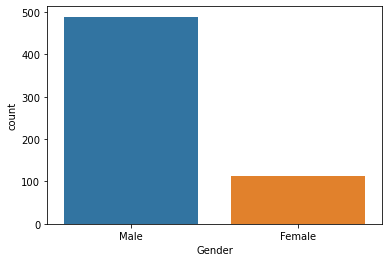

In [3360]:
#Proceeding to Gender column for exploration

sns.countplot(loan['Gender'])
loan['Gender'].value_counts()

### Observation 

We observe that the number of applicants are mostly males, and very few are females in comparison.
We can replace the missing values using Male, since missing values are 13.

But first we will observe if number of dependents have any relation with the Gender column.

In [3361]:
loan[loan['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


### Observation

The missing values in Gender column have all type of values (0,1,2,3+). Hence we will fill the missing values using M as gender.

Yes    398
No     213
Name: Married, dtype: int64

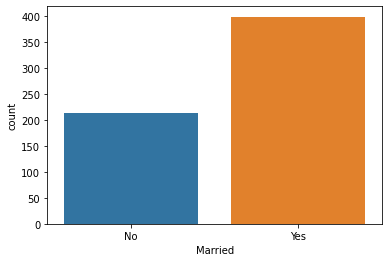

In [3362]:
#Exploring the Married column

sns.countplot(loan.Married)
loan.Married.value_counts()

### Observation -

Majority of the people in our dataset are married. Since we have 3 missing values in this column, we choose to replace the 3 missing values using 'Yes'.

People with Marital status as No are almost half as compared to Married people.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

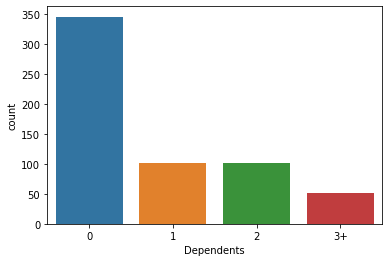

In [3363]:
#Exploring the Dependents column -

sns.countplot(loan.Dependents)
loan.Dependents.value_counts()

### Observation

Majority of the people in our dataset have 0 dependents (345)

Number of rows with dependents 1 and 2 are almost equal (102 and 101)
There are only 51 rows with 3+ dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

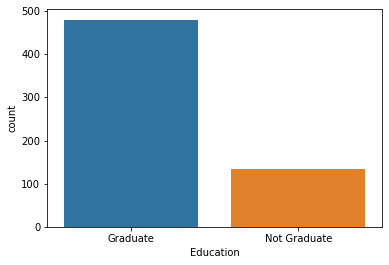

In [3364]:
#Exploring the Education column

sns.countplot(loan.Education)
loan.Education.value_counts()

### Observation -

There are 2 categories in Education column - Graduate and Not-Graduate.

Number of Graduates are much higher than the non-Graduates. Graduates are 480 in number and Non Graduates are 134.

No     500
Yes     82
Name: Self_Employed, dtype: int64

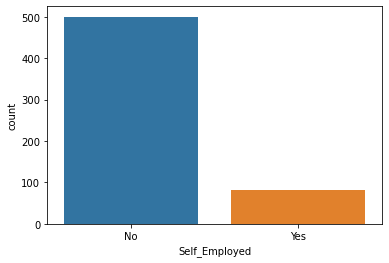

In [3365]:
# Exploring the Self employed column

sns.countplot(loan.Self_Employed)
loan.Self_Employed.value_counts()

### Observation 

Majority of the people are not self employed (500)
The self employed people have a very less proportion (82)

1.0    475
0.0     89
Name: Credit_History, dtype: int64

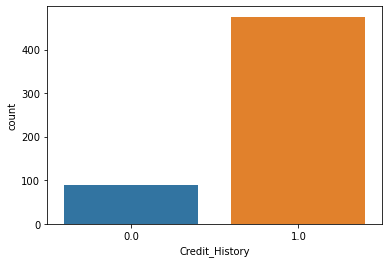

In [3366]:
#Exploring the Credit History column

sns.countplot(loan.Credit_History)
loan.Credit_History.value_counts()

### Observation -

There are 475 people who have a credit history present.
There are 89 people who do not have a credit history.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

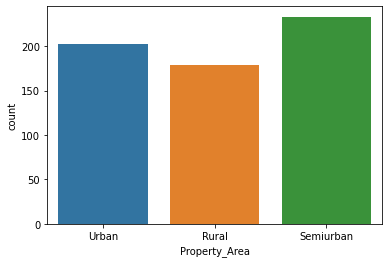

In [3367]:
#Exploring the Property area column

sns.countplot(loan.Property_Area)
loan.Property_Area.value_counts()

### Observation

We have 3 categories in Property area column

The people with Property in semi-urban area are the highest (233).
The people with Property in Rural area are the lowest (179).
The people with Property in urban area are almost similar but a little less than semi-urban (202). 


Thr distribution in this column is almost similarly divided.


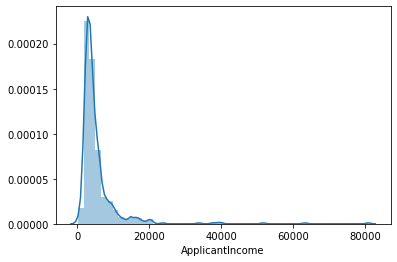

In [3368]:
#Exploring the Applicant income

sns.distplot(loan.ApplicantIncome)

### Observation

Majority of the people have the income range between 0 to 20000. Rest of the people (Higher income) are quite less.

The data is highly right skewed.

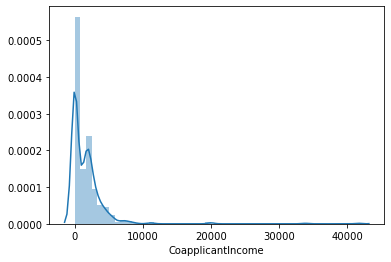

In [3369]:
#Exploring thg the co-applicant income column

sns.distplot(loan.CoapplicantIncome)

### Observation

The range of co-applicant income is majorly between 0 and 10000. Higher income co-applicants are quite less in number.
The data is highly right skewed.

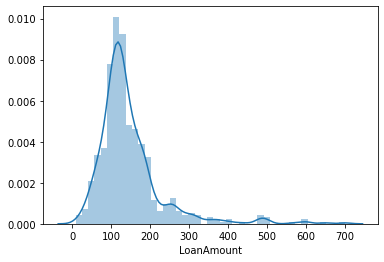

In [3370]:
#Exploring the LOan amount column

sns.distplot(loan.LoanAmount)

### Observation

The loan amount majorly ranges between 0 - 300.

There are a very few applicants for loan higher than 300. The data is right skewed and would require treatment.

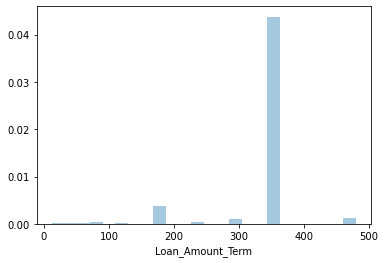

In [3371]:
#Exploring the Loan_amount_term column

sns.distplot(loan.Loan_Amount_Term)

In [3372]:
loan.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Observation 

The loan amount term column has 10 different categories, which is the number of months for which the loan was provided.

Majority of the people took loan for 360 months, and the number significantly reduced once when the loan term was changed from 360 months to 180 months.
We can consider this column as a ordinal column instead of a numerical column since the number of months belong to defined categories

### We will now proceed to Bivariate analysis.

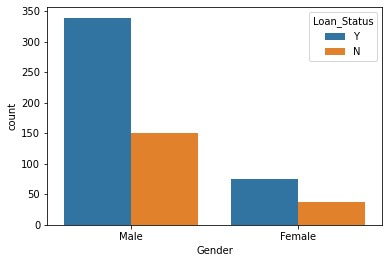

In [3373]:
#Relation between loanstatus and gender

sns.countplot(loan.Gender, hue = loan.Loan_Status)

### Observation -

The loan status does is not categorized on the basis of gender, the males getting loan and the females getting loan are double than those who did not get a loan.

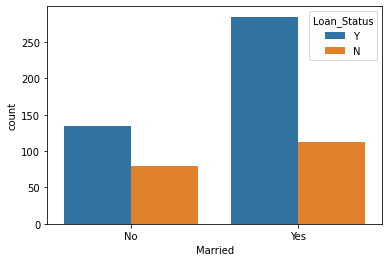

In [3374]:
# Relation between Marital status and gender

sns.countplot(loan.Married, hue = loan.Loan_Status)

### Observation -

The graph indicates that the married people have a higher chance of getting a loan than the non-married ones. The ratio is not highly different, but the difference is observable in the graph.

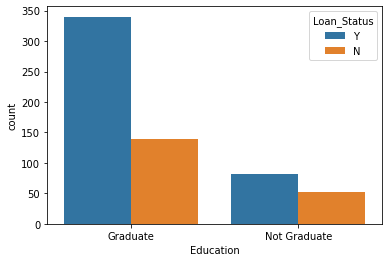

In [3375]:
# Relation between education and loan status 

sns.countplot(loan.Education, hue = loan.Loan_Status)

### Observation -

Similar to Marital status, the graduates have a higher chance of getting the loan approved than the non-graduates.
The ratio is not very high but the difference is observable.

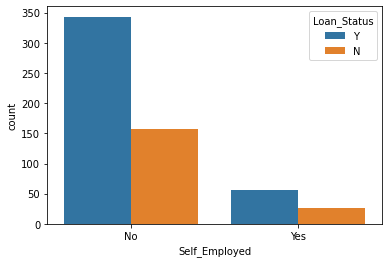

In [3376]:
# Relation between self employed and Loan status

sns.countplot(loan.Self_Employed, hue = loan.Loan_Status)

### Observation -

Self employment factor does not have any major impact on Loan status. The non-approved loans are almost half of approved loans for both the categories.

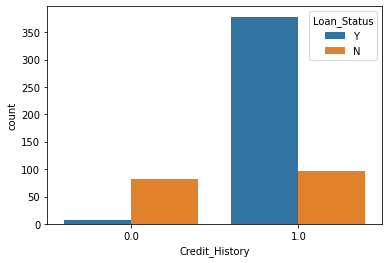

In [3377]:
# Relation between Credit history and Loan status 

sns.countplot(loan.Credit_History, hue = loan.Loan_Status)

### Observation 

The Credit history column has a major impact on the Loan status field. The people who have a history of Credit have higher chances of the loan application getting approved than those who do not have a credit history.

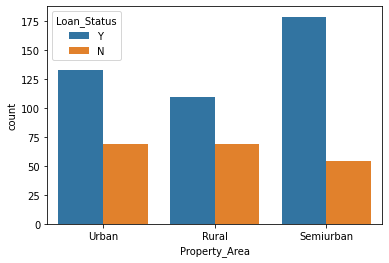

In [3378]:
#Relation of property area and loan status

sns.countplot(loan.Property_Area, hue = loan.Loan_Status)

### Observation

The people with property in rural area have a higher chance of getting the loan rejected than the urban and semi-urban areas.
The people who have property in semi-urban area have high approval rates than the other property categories.

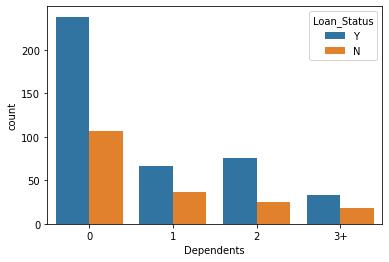

In [3379]:
# Relation between dependents and loan status

sns.countplot(loan.Dependents, hue = loan.Loan_Status)

### Observation 

We observe that in case the number of dependents are 0, the chances of loan getting approved are higher.
- In case the dependents are 1, the chances of loan getting approved are lower than than approved ones.
- In case the dependents are 2, the chances of loan getting approved are higher than non-approved loans.
- In case of 3+ dependents, the loans get rejected more,as compared to approved loans.



In [3380]:
# Combining 1 and 3+ categories since the distribution is similar

loan['Dependents'] = loan['Dependents'].replace('3+', '1')

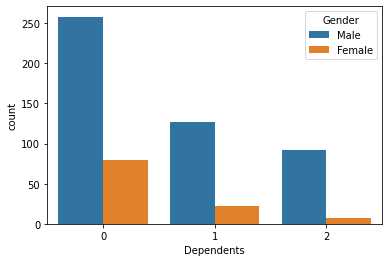

In [3381]:
sns.countplot(loan.Dependents, hue = loan.Gender)

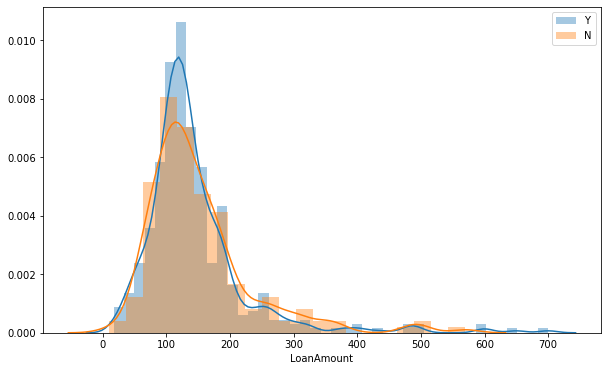

In [3382]:
#Relation between loan amount and loan_status

plt.figure(figsize=(10,6))
sns.distplot(loan.LoanAmount[loan['Loan_Status']=='Y'])
sns.distplot(loan.LoanAmount[loan['Loan_Status']=='N'])
plt.legend(loan.Loan_Status.unique())
plt.show()

### Observation

The chances of loan getting approved are higher when the loan amount is between 0 - 200.

The loans get rejected more between 200  - 400, and between 500 - 600.
Loans higher than 600 are approved.

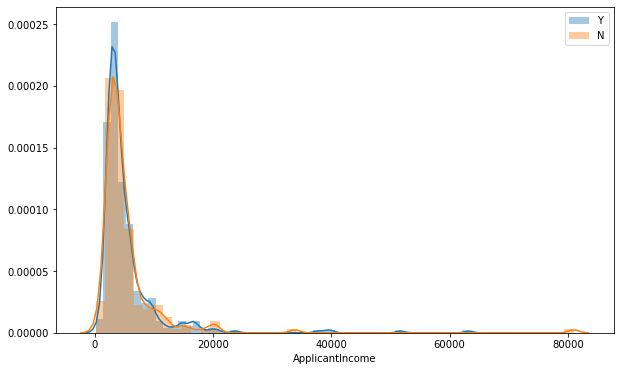

In [3383]:
#Relation between Applicant income and loan_status

plt.figure(figsize=(10,6))
sns.distplot(loan.ApplicantIncome[loan['Loan_Status']=='Y'])
sns.distplot(loan.ApplicantIncome[loan['Loan_Status']=='N'])
plt.legend(loan.Loan_Status.unique())
plt.show()

### Observation

- If the applicant income is within 0 - 20000, the loan has a higher chance of getting approved.
- Once the income crosses 60000, the chance of loan getting rejected increase.

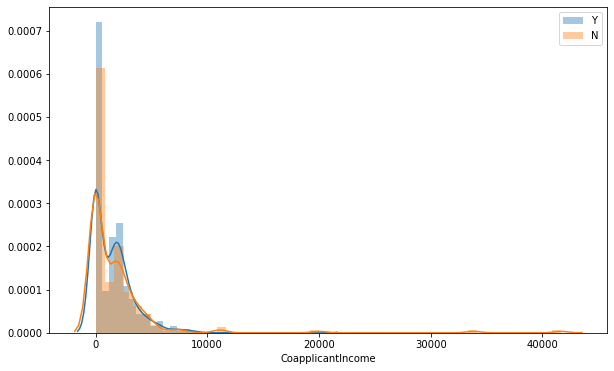

In [3384]:
#Relation between co-applicant income and loan_status

plt.figure(figsize=(10,6))
sns.distplot(loan.CoapplicantIncome[loan['Loan_Status']=='Y'])
sns.distplot(loan.CoapplicantIncome[loan['Loan_Status']=='N'])
plt.legend(loan.Loan_Status.unique())
plt.show()

### Observation

If the co-applicants income is between 1000 -2000, the chances of loan getting approved are higher.
- If the co-applicant income is higher than 10000, the chances are that the loan will get rejected.
- As the co-applicant income increases, the rejection chance decreases.

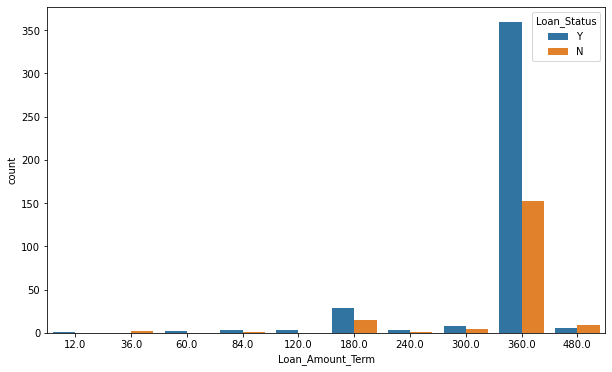

In [3385]:
#Relation between Loan_Amount_term and Loan status

plt.figure(figsize=(10,6))
sns.countplot(loan.Loan_Amount_Term, hue=loan.Loan_Status)


### Observation

If the number of months are greater tha 360, the chances of loan getting rejected is higher.

- In majority of the cases, if the loan is for 360 months, the chance of approval is higher than rejection.
- In case loan term is for 300 months, the loan can either get accepted or rejected.
- Loans for ~200 months have a slightly higher chance of approval than rejections.
- Loans for 12 months are usually accepted.
- Loans between 50 - 100 months can either get accepted or rejected.

We can combine some categories here.

In [3386]:
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].replace([12.0,60.0], 120.0)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].replace([84.0,180.0,240.0], 300.0)

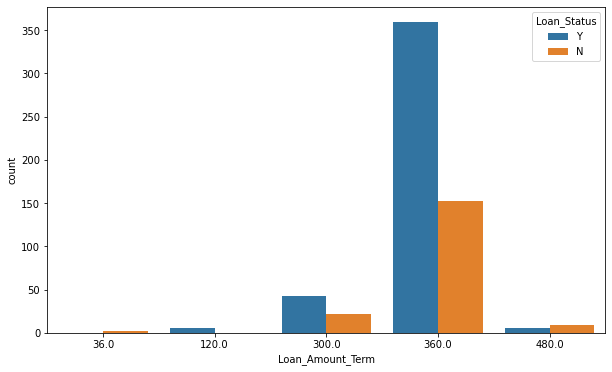

In [3387]:
plt.figure(figsize=(10,6))
sns.countplot(loan.Loan_Amount_Term, hue=loan.Loan_Status)

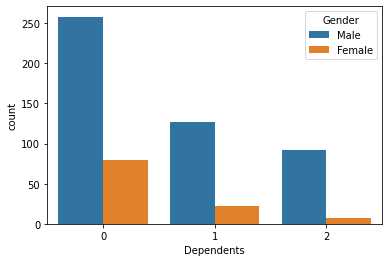

In [3388]:
# Relation between Gender and Dependents column

sns.countplot(loan.Dependents, hue = loan.Gender)

### Observation

Number of dependents are higher for males as compared to females. As the number of dependents increases, the females are decreasing. The ratio between male and females is not equally divided for all categories of dependents. 

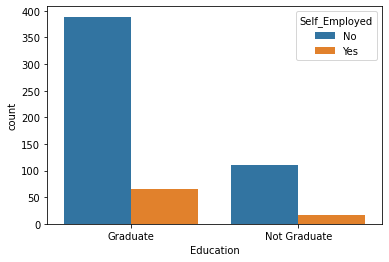

In [3389]:
#Relation between Education and Self employed

sns.countplot(loan.Education, hue = loan.Self_Employed)

### Observation

There is no relationship between graduates and self employed people.

The ratios for both categories are almost equal.

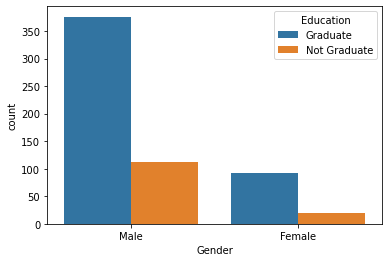

In [3390]:
# Relation between Gender and Education

sns.countplot(loan.Gender, hue = loan.Education)

### Observation

There is no relationship between graduates and gender.

The ratios for both categories are almost equal.

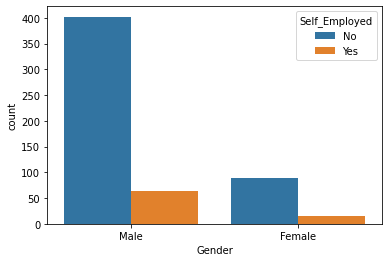

In [3391]:
#Relation between Self employed and Gender

sns.countplot(loan.Gender, hue = loan.Self_Employed)

### Observation

There is no relationship between gender and self employed people.

The ratios for both categories are almost equal.

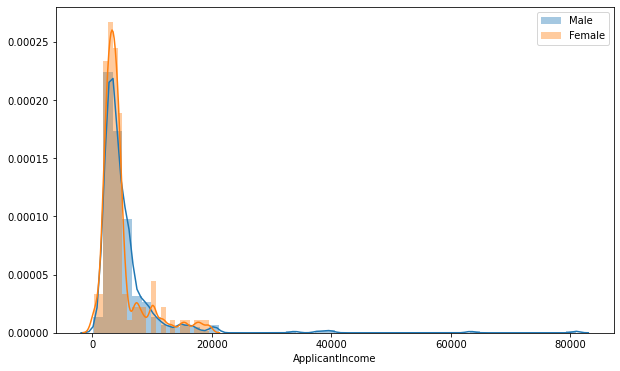

In [3392]:
#Relation between Gender and annual income

plt.figure(figsize=(10,6))
sns.distplot(loan.ApplicantIncome[loan['Gender']=='Male'])
sns.distplot(loan.ApplicantIncome[loan['Gender']=='Female'])
plt.legend(loan.Gender.unique())
plt.show()

## Observation -

Females have a income range of 0 - 20000

The higher ranges belong to males only :(

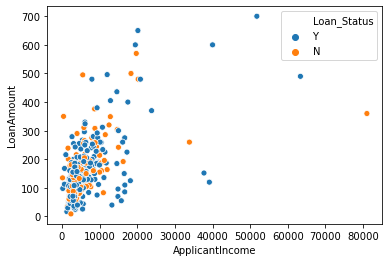

In [3393]:
#Relation between applicant income and loan amount

sns.scatterplot(x = loan.ApplicantIncome, y = loan.LoanAmount, hue = loan.Loan_Status)

### Observation

- People with income above 25000 tend to apply for lesser loans than people in income range of 0 - 20000.

## Conclusions of the EDA

- The loan status is impacted by -

- Marital Status - Married people have high chances of loan getting approved
- Education - Educated people have higher chances of loan getting approved
- Credit history - People who have credit history have very high chances of loan getting approved
- Property area - People with property in semi-urban area have high chances of loan getting approved
- Loan_amount_term - If loan is for 360 months, chances of loan approval are higher.


- We also observed skewness in numerical data

# Data modeling

In [3394]:
#Changing all the yes and Y to 1 and No and N to 0 in our dataset

loan = loan.replace('Yes',1)
loan = loan.replace('No',0)
loan = loan.replace('Y',1)
loan = loan.replace('N',0)

In [3395]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0.0,0,Graduate,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,1.0,1,Graduate,0.0,4106,0.0,40.0,300.0,1.0,Rural,1
611,Male,1.0,1,Graduate,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,1.0,2,Graduate,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


We will now treat the missing data in our dataset.

In [3396]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3397]:
loan[loan.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,1.0,2,Not Graduate,0.0,3365,1917.0,112.0,360.0,0.0,Rural,0
126,NaN,1.0,1,Graduate,0.0,23803,0.0,370.0,360.0,1.0,Rural,1
171,NaN,1.0,1,Graduate,0.0,51763,0.0,700.0,300.0,1.0,Urban,1
188,NaN,1.0,0,Graduate,1.0,674,5296.0,168.0,360.0,1.0,Rural,1
314,NaN,1.0,0,Graduate,0.0,2473,1843.0,159.0,360.0,1.0,Rural,0
334,NaN,1.0,1,Graduate,1.0,9833,1833.0,182.0,300.0,1.0,Urban,1
460,NaN,1.0,0,Graduate,1.0,2083,4083.0,160.0,360.0,NaN,Semiurban,1
467,NaN,1.0,0,Graduate,0.0,16692,0.0,110.0,360.0,1.0,Semiurban,1
477,NaN,1.0,2,Graduate,0.0,2873,1872.0,132.0,360.0,0.0,Semiurban,0
507,NaN,0.0,0,Graduate,0.0,3583,0.0,96.0,360.0,1.0,Urban,0


In [3398]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 57.7+ KB


In [3399]:
### Replacing the missing genders with Male since the male proportion is higher.

loan.Gender.fillna('Male', inplace = True)

In [3400]:
loan.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3401]:
#Replacing missing values in married column

loan[loan['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,0.0,3816,754.0,160.0,360.0,1.0,Urban,1
228,Male,NaN,NaN,Graduate,0.0,4758,0.0,158.0,480.0,1.0,Semiurban,1
435,Female,NaN,NaN,Graduate,0.0,10047,0.0,NaN,300.0,1.0,Semiurban,1


In [3402]:
#Replacing the values with 'Yes', since majority of the values are Married and Loan status is also Y for these.

loan['Married'].fillna(1, inplace = True)

In [3403]:
loan.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3404]:
#Replacing missing values in Dependents column

loan[loan['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,1.0,NaN,Graduate,0.0,13650,0.0,NaN,360.0,1.0,Urban,1
104,Male,1.0,NaN,Graduate,0.0,3816,754.0,160.0,360.0,1.0,Urban,1
120,Male,1.0,NaN,Graduate,0.0,5667,2667.0,180.0,360.0,1.0,Rural,1
226,Male,1.0,NaN,Not Graduate,1.0,4735,0.0,138.0,360.0,1.0,Urban,0
228,Male,1.0,NaN,Graduate,0.0,4758,0.0,158.0,480.0,1.0,Semiurban,1
293,Female,0.0,NaN,Graduate,0.0,5417,0.0,143.0,480.0,0.0,Urban,0
301,Male,1.0,NaN,Not Graduate,0.0,2875,1750.0,105.0,360.0,1.0,Semiurban,1
332,Male,0.0,NaN,Graduate,0.0,2833,0.0,71.0,360.0,1.0,Urban,1
335,Male,1.0,NaN,Graduate,1.0,5503,4490.0,70.0,NaN,1.0,Semiurban,1
346,Male,1.0,NaN,Not Graduate,0.0,3523,3230.0,152.0,360.0,0.0,Rural,0


In [3405]:
#Replacing values for Dependents = 2

loan.Dependents.fillna('2', inplace = True)


In [3406]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 57.7+ KB


In [3407]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3408]:
#Replacing the self employed column

loan[loan['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,1.0,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1
19,Male,1.0,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1
24,Male,1.0,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
29,Female,0.0,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,1
30,Male,1.0,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
95,Male,0.0,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,0
107,Male,0.0,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,0
111,Female,1.0,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1
114,Male,0.0,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,1
158,Male,0.0,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,1


In [3409]:
#Filling the missing values as No, since majority of the population is not self employed

loan.Self_Employed.fillna(0, inplace = True)

In [3410]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3411]:
#Treating the loan_Amount column

loan[loan['LoanAmount'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
35,Male,1.0,0,Graduate,0.0,2275,2067.0,NaN,360.0,1.0,Urban,1
63,Male,1.0,1,Graduate,0.0,4945,0.0,NaN,360.0,0.0,Rural,0
81,Male,1.0,1,Graduate,1.0,2395,0.0,NaN,360.0,1.0,Semiurban,1
95,Male,0.0,0,Graduate,0.0,6782,0.0,NaN,360.0,NaN,Urban,0
102,Male,1.0,2,Graduate,0.0,13650,0.0,NaN,360.0,1.0,Urban,1
103,Male,1.0,0,Graduate,0.0,4652,3583.0,NaN,360.0,1.0,Semiurban,1
113,Female,0.0,1,Graduate,1.0,7451,0.0,NaN,360.0,1.0,Semiurban,1
127,Male,0.0,0,Graduate,0.0,3865,1640.0,NaN,360.0,1.0,Rural,1
202,Male,1.0,1,Not Graduate,0.0,3992,0.0,NaN,300.0,1.0,Urban,0


In [3412]:
#Filling the loan_amount missing values by mean of loan amounts

loan.LoanAmount.fillna(loan['LoanAmount'].mean(), inplace = True)

In [3413]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3414]:
#Treating the missing values in Loan_Amount_Term column

loan[loan['Loan_Amount_Term'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,1.0,0,Graduate,0.0,2600,3500.0,115.0,NaN,1.0,Urban,1
36,Male,1.0,0,Graduate,0.0,1828,1330.0,100.0,NaN,0.0,Urban,0
44,Male,1.0,0,Not Graduate,1.0,4695,0.0,96.0,NaN,1.0,Urban,1
45,Female,0.0,0,Graduate,0.0,3410,0.0,88.0,NaN,1.0,Urban,1
73,Male,1.0,1,Not Graduate,0.0,4755,0.0,95.0,NaN,0.0,Semiurban,0
112,Male,1.0,0,Not Graduate,0.0,3572,4114.0,152.0,NaN,0.0,Rural,0
165,Male,1.0,0,Graduate,0.0,3707,3166.0,182.0,NaN,1.0,Rural,1
197,Female,0.0,0,Not Graduate,0.0,1907,2365.0,120.0,NaN,1.0,Urban,1
223,Male,1.0,0,Graduate,0.0,7578,1010.0,175.0,NaN,1.0,Semiurban,1
232,Male,0.0,0,Not Graduate,0.0,3189,2598.0,120.0,NaN,1.0,Rural,1


In [3415]:
#Filling the values using the most recurring value in Loan_AMount_Term column i.e 360

loan.Loan_Amount_Term.fillna(360.0, inplace = True)

In [3416]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3417]:
# Replacing the Credit_History column

loan[loan['Credit_History'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,0.0,1,Not Graduate,0.0,3596,0.0,100.000000,300.0,NaN,Urban,1
24,Male,1.0,1,Graduate,0.0,3717,2925.0,151.000000,360.0,NaN,Semiurban,0
30,Male,1.0,1,Graduate,0.0,4166,3369.0,201.000000,360.0,NaN,Urban,0
42,Male,1.0,0,Graduate,0.0,2400,0.0,75.000000,360.0,NaN,Urban,1
79,Male,1.0,1,Not Graduate,1.0,3333,2166.0,130.000000,360.0,NaN,Semiurban,1
83,Male,1.0,0,Graduate,0.0,6000,2250.0,265.000000,360.0,NaN,Semiurban,0
86,Male,1.0,2,Not Graduate,0.0,3333,2000.0,99.000000,360.0,NaN,Semiurban,1
95,Male,0.0,0,Graduate,0.0,6782,0.0,146.412162,360.0,NaN,Urban,0
117,Male,1.0,1,Graduate,0.0,2214,1398.0,85.000000,360.0,NaN,Urban,1
125,Female,0.0,0,Graduate,0.0,3692,0.0,93.000000,360.0,NaN,Rural,1


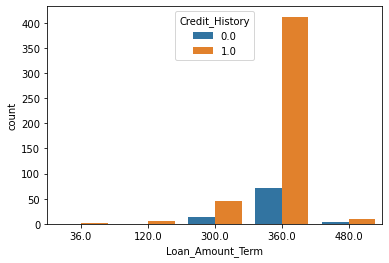

In [3418]:
sns.countplot(loan.Loan_Amount_Term, hue = loan.Credit_History)

In [3419]:
#Since majority of the values in our dataset have credit rating as 1, and if we compare with Loan_amount_term, we have majority of the values as 1, so filling the missing values as 1.

loan.Credit_History.fillna(1, inplace = True)

In [3420]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3421]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 57.7+ KB


### We have successfully replaced the missing values from our dataset.

In [3422]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 57.7+ KB


## Outlier detection

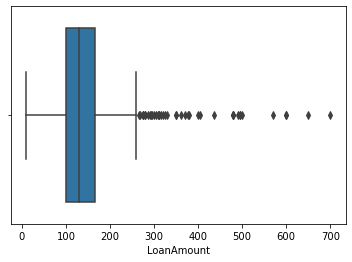

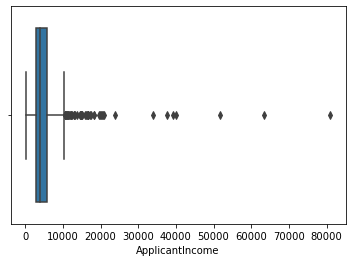

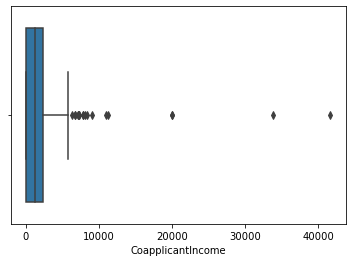

In [3423]:
#Checking for outliers -

for i in ['LoanAmount','ApplicantIncome', 'CoapplicantIncome']:
    sns.boxplot(loan[i])
    plt.show()

In [3424]:
from scipy.stats import zscore

In [3425]:
zs = zscore(loan[['LoanAmount','ApplicantIncome', 'CoapplicantIncome']])

In [3426]:
loan_without_outliers = loan[((abs(zs)<3).all(axis=1))]

In [3427]:
loan_without_outliers

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0.0,0,Graduate,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,1.0,1,Graduate,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,1.0,0,Graduate,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,0.0,0,Graduate,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0.0,0,Graduate,0.0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,1.0,1,Graduate,0.0,4106,0.0,40.000000,300.0,1.0,Rural,1
611,Male,1.0,1,Graduate,0.0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,1.0,2,Graduate,0.0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [3428]:
outlier = loan[((abs(zs)<3).all(axis=1))==False]

In [3429]:
outlier

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,1.0,1,Graduate,0.0,12841,10968.0,349.0,360.0,1.0,Semiurban,0
126,Male,1.0,1,Graduate,0.0,23803,0.0,370.0,360.0,1.0,Rural,1
130,Male,0.0,0,Graduate,1.0,20166,0.0,650.0,480.0,1.0,Urban,1
155,Male,1.0,1,Graduate,0.0,39999,0.0,600.0,300.0,0.0,Semiurban,1
171,Male,1.0,1,Graduate,0.0,51763,0.0,700.0,300.0,1.0,Urban,1
177,Male,1.0,1,Graduate,0.0,5516,11300.0,495.0,360.0,0.0,Semiurban,0
183,Male,1.0,1,Graduate,0.0,33846,0.0,260.0,360.0,1.0,Semiurban,0
185,Male,1.0,0,Graduate,1.0,39147,4750.0,120.0,360.0,1.0,Semiurban,1
278,Male,1.0,0,Graduate,0.0,14583,0.0,436.0,360.0,1.0,Semiurban,1
308,Male,0.0,0,Graduate,0.0,20233,0.0,480.0,360.0,1.0,Rural,0


In [3430]:
#We will check how our model performs with and without outliers and then confirm how to deal with outlier data

## Treating skewness

In [3431]:
loan.skew()

Married             -0.644850
Dependents           0.761333
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -3.058465
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

In [3432]:
loan_without_outliers.skew()

Married             -0.631755
Dependents           0.774976
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -3.162674
Credit_History      -2.010069
Loan_Status         -0.828815
dtype: float64

In [3433]:
#Checking log transform for ApplicantIncome and LoanAmount column

loan['ApplicantIncome'] = np.log(loan['ApplicantIncome'])
loan_without_outliers['ApplicantIncome'] = np.log(loan_without_outliers['ApplicantIncome'])

In [3434]:
loan['LoanAmount'] = np.log(loan['LoanAmount'])
loan_without_outliers['LoanAmount'] = np.log(loan_without_outliers['LoanAmount'])

In [3435]:
loan.skew()

Married             -0.644850
Dependents           0.761333
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount          -0.223227
Loan_Amount_Term    -3.058465
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

In [3436]:
loan['ApplicantIncome']

0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
         ...   
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, Length: 614, dtype: float64

In [3437]:
loan['LoanAmount']

0      4.986426
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount, Length: 614, dtype: float64

In [3438]:
# Treating coapplicant income column with Sqrt transform since it contains 0 values

loan['CoapplicantIncome'] = np.sqrt(loan['CoapplicantIncome'])
loan_without_outliers['CoapplicantIncome'] = np.sqrt(loan_without_outliers['CoapplicantIncome'])

In [3439]:
loan.skew()

Married             -0.644850
Dependents           0.761333
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome    0.979561
LoanAmount          -0.223227
Loan_Amount_Term    -3.058465
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

In [3440]:
loan_without_outliers.skew()

Married             -0.631755
Dependents           0.774976
Self_Employed        2.218831
ApplicantIncome     -0.207659
CoapplicantIncome    0.217598
LoanAmount          -0.914952
Loan_Amount_Term    -3.162674
Credit_History      -2.010069
Loan_Status         -0.828815
dtype: float64

In [3441]:
#Applying sqrt again to get the value below 0.s as threshold

loan['CoapplicantIncome'] = np.sqrt(loan['CoapplicantIncome'])

In [3442]:
loan.skew()

Married             -0.644850
Dependents           0.761333
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome   -0.008866
LoanAmount          -0.223227
Loan_Amount_Term    -3.058465
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

In [3443]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0.0,0,Graduate,0.0,8.674026,0.000000,4.986426,360.0,1.0,Urban,1
1,Male,1.0,1,Graduate,0.0,8.430109,6.231611,4.852030,360.0,1.0,Rural,0
2,Male,1.0,0,Graduate,1.0,8.006368,0.000000,4.189655,360.0,1.0,Urban,1
3,Male,1.0,0,Not Graduate,0.0,7.856707,6.968446,4.787492,360.0,1.0,Urban,1
4,Male,0.0,0,Graduate,0.0,8.699515,0.000000,4.948760,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0.0,0,Graduate,0.0,7.972466,0.000000,4.262680,360.0,1.0,Rural,1
610,Male,1.0,1,Graduate,0.0,8.320205,0.000000,3.688879,300.0,1.0,Rural,1
611,Male,1.0,1,Graduate,0.0,8.996157,3.935979,5.533389,360.0,1.0,Urban,1
612,Male,1.0,2,Graduate,0.0,8.933664,0.000000,5.231109,360.0,1.0,Urban,1


In [3444]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 57.7+ KB


In [3445]:
#We have successfully treated the skewness in our data

# Encoding the categorical data

In [3446]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [3447]:
#Encoding loan data

loan['Gender'] = le.fit_transform(loan['Gender'])
loan['Education'] = le.fit_transform(loan['Education'])
loan['Property_Area'] = le.fit_transform(loan['Property_Area'])
loan['Loan_Amount_Term'] = le.fit_transform(loan['Loan_Amount_Term'])

In [3448]:
#Encoding loan_without_outliers data

loan_without_outliers['Gender'] = le.fit_transform(loan_without_outliers['Gender'])
loan_without_outliers['Education'] = le.fit_transform(loan_without_outliers['Education'])
loan_without_outliers['Property_Area'] = le.fit_transform(loan_without_outliers['Property_Area'])

In [3449]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,0,0.0,8.674026,0.000000,4.986426,3,1.0,2,1
1,1,1.0,1,0,0.0,8.430109,6.231611,4.852030,3,1.0,0,0
2,1,1.0,0,0,1.0,8.006368,0.000000,4.189655,3,1.0,2,1
3,1,1.0,0,1,0.0,7.856707,6.968446,4.787492,3,1.0,2,1
4,1,0.0,0,0,0.0,8.699515,0.000000,4.948760,3,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0.0,0,0,0.0,7.972466,0.000000,4.262680,3,1.0,0,1
610,1,1.0,1,0,0.0,8.320205,0.000000,3.688879,2,1.0,0,1
611,1,1.0,1,0,0.0,8.996157,3.935979,5.533389,3,1.0,2,1
612,1,1.0,2,0,0.0,8.933664,0.000000,5.231109,3,1.0,2,1


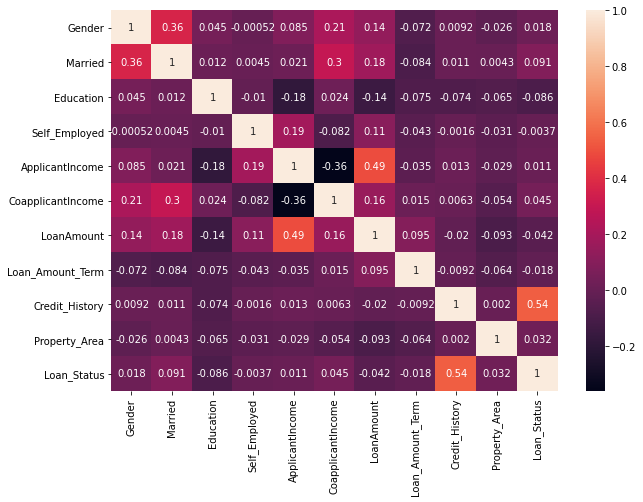

In [3450]:
corr = loan.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True)

# Fitting the data in Classification models

In [3451]:
x = loan.drop('Loan_Status', axis = 1)
y = loan['Loan_Status']

In [3452]:
#Importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3453]:
#Creating instances for classification models

dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [3454]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0.0,0,0,0.0,8.674026,0.000000,4.986426,3,1.0,2
1,1,1.0,1,0,0.0,8.430109,6.231611,4.852030,3,1.0,0
2,1,1.0,0,0,1.0,8.006368,0.000000,4.189655,3,1.0,2
3,1,1.0,0,1,0.0,7.856707,6.968446,4.787492,3,1.0,2
4,1,0.0,0,0,0.0,8.699515,0.000000,4.948760,3,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0.0,0,0,0.0,7.972466,0.000000,4.262680,3,1.0,0
610,1,1.0,1,0,0.0,8.320205,0.000000,3.688879,2,1.0,0
611,1,1.0,1,0,0.0,8.996157,3.935979,5.533389,3,1.0,2
612,1,1.0,2,0,0.0,8.933664,0.000000,5.231109,3,1.0,2


In [3455]:
#Fitting models and checking for classification metrics

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    for i in [dt, gnb, svc, knn, lg]:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        test_score = accuracy_score(y_test, predict)
        train_score = accuracy_score(y_train,i.predict(x_train))
        if abs(train_score - test_score) <= 0.02:
            print(i)
            print('At random state', k)
            print('Accuracy score for train data ', accuracy_score(y_test, pred))
            print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
            print(classification_report(y_test, pred))
            print(confusion_matrix(y_test, pred))
            print('------------------------------------------')

SVC()
At random state 73
Accuracy score for train data  0.7189189189189189
Accuracy score for test data 0.6736596736596736
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.72      1.00      0.84       133

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.60       185

[[  0  52]
 [  0 133]]
------------------------------------------


In [3456]:
# x1 = loan_without_outliers.drop('Loan_Status', axis = 1)
# y1 = loan_without_outliers['Loan_Status']

In [3457]:
dt1 = DecisionTreeClassifier()
gnb1 = GaussianNB()
svc1 = SVC()
knn1 = KNeighborsClassifier()
lg1 = LogisticRegression()

In [3458]:
#Fitting models and checking for classification metrics

for k in range(101):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.3, random_state = k)
    for i in [dt1, gnb1, svc1, knn1, lg1]:
        i.fit(x_train1, y_train1)
        pred = i.predict(x_test1)
        test_score = accuracy_score(y_test1, predict1)
        train_score = accuracy_score(y_train1,i.predict(x_train1))
        if abs(train_score - test_score) <= 0.02:
            print(i)
            print('At random state', k)
            print('Accuracy score for train data ', accuracy_score(y_test1, pred))
            print('Accuracy score for test data', accuracy_score(y_train1, i.predict(x_train1)))
            print(classification_report(y_test1, pred))
            print(confusion_matrix(y_test1, pred))
            print('------------------------------------------')

GaussianNB()
At random state 100
Accuracy score for train data  0.838150289017341
Accuracy score for test data 0.8014888337468983
              precision    recall  f1-score   support

           0       0.81      0.49      0.61        45
           1       0.84      0.96      0.90       128

    accuracy                           0.84       173
   macro avg       0.83      0.72      0.75       173
weighted avg       0.84      0.84      0.82       173

[[ 22  23]
 [  5 123]]
------------------------------------------
SVC()
At random state 100
Accuracy score for train data  0.8497109826589595
Accuracy score for test data 0.8138957816377171
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        45
           1       0.85      0.97      0.91       128

    accuracy                           0.85       173
   macro avg       0.85      0.74      0.77       173
weighted avg       0.85      0.85      0.84       173

[[ 23  22]
 [  4 124]]
---

## Observation 

By looking at the metrics, we get to know that the SVC is able to be predict the best scores at random state 100 on data where outliers are removed. Hence we will use this model to hypertune.

# Ensemble methods 

In [3459]:
from sklearn.ensemble import RandomForestClassifier

In [3460]:
rfc = RandomForestClassifier()

In [3461]:
for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    rfc.fit(x_train, y_train)
    predict = rfc.predict(x_test)
    test_score = accuracy_score(y_test, predict)
    train_score = accuracy_score(y_train,rfc.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print('At random_state = ',k)
        print(rfc, accuracy_score(y_test, predict))
        print('Accuracy score for train data', accuracy_score(y_train, rfc.predict(x_train)))
        print(classification_report(y_test, predict))
        print(confusion_matrix(y_test, predict))
        print('-----------------------------------------------------------')

At random_state =  0
RandomForestClassifier() 0.8054054054054054
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        51
           1       0.82      0.93      0.87       134

    accuracy                           0.81       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185

[[ 24  27]
 [  9 125]]
-----------------------------------------------------------
At random_state =  2
RandomForestClassifier() 0.8
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.82      0.47      0.59        58
           1       0.80      0.95      0.87       127

    accuracy                           0.80       185
   macro avg       0.81      0.71      0.73       185
weighted avg       0.80      0.80      0.78       185

[[ 27  31]
 [  6 121]]
---------------------------------------------------------

At random_state =  32
RandomForestClassifier() 0.8162162162162162
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.78      0.52      0.62        54
           1       0.83      0.94      0.88       131

    accuracy                           0.82       185
   macro avg       0.80      0.73      0.75       185
weighted avg       0.81      0.82      0.80       185

[[ 28  26]
 [  8 123]]
-----------------------------------------------------------
At random_state =  34
RandomForestClassifier() 0.8108108108108109
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.80      0.45      0.58        53
           1       0.81      0.95      0.88       132

    accuracy                           0.81       185
   macro avg       0.81      0.70      0.73       185
weighted avg       0.81      0.81      0.79       185

[[ 24  29]
 [  6 126]]
----------------------------------------

At random_state =  72
RandomForestClassifier() 0.8108108108108109
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.82      0.48      0.61        56
           1       0.81      0.95      0.88       129

    accuracy                           0.81       185
   macro avg       0.81      0.72      0.74       185
weighted avg       0.81      0.81      0.79       185

[[ 27  29]
 [  6 123]]
-----------------------------------------------------------
At random_state =  73
RandomForestClassifier() 0.8324324324324325
Accuracy score for train data 1.0
              precision    recall  f1-score   support

           0       0.86      0.48      0.62        52
           1       0.83      0.97      0.89       133

    accuracy                           0.83       185
   macro avg       0.84      0.73      0.76       185
weighted avg       0.84      0.83      0.82       185

[[ 25  27]
 [  4 129]]
----------------------------------------

In [3462]:
from sklearn.ensemble import AdaBoostClassifier

In [3463]:
ad = AdaBoostClassifier()

In [3464]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)
ad.fit(x_train, y_train)
predict = ad.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,ad.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(ad, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, ad.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

AdaBoostClassifier() 0.7783783783783784
Accuracy score for train data 0.8624708624708625
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        63
           1       0.77      0.94      0.85       122

    accuracy                           0.78       185
   macro avg       0.79      0.70      0.72       185
weighted avg       0.78      0.78      0.76       185

[[ 29  34]
 [  7 115]]
-----------------------------------------------------------


In [3465]:
from sklearn.ensemble import GradientBoostingClassifier

In [3466]:
gd = GradientBoostingClassifier()

In [3467]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11)
gd.fit(x_train, y_train)
predict = gd.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,gd.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(gd, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, gd.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

GradientBoostingClassifier() 0.7567567567567568
Accuracy score for train data 0.8974358974358975
              precision    recall  f1-score   support

           0       0.70      0.52      0.59        64
           1       0.78      0.88      0.83       121

    accuracy                           0.76       185
   macro avg       0.74      0.70      0.71       185
weighted avg       0.75      0.76      0.75       185

[[ 33  31]
 [ 14 107]]
-----------------------------------------------------------


## Observation -

The random forest classifier is showing overfitting. Hence we will not choose this model.

Adaboost and Gradient boost have less accuracies than other models, hence proceeding with SVC on data without outliers as our best model.

# Cross Validation of the model

In [3468]:
from sklearn.model_selection import cross_val_score

In [3469]:
for i in range(2,9):
    cv = cross_val_score(svc, x1, y1, cv=i)
    print(svc, cv.mean())

SVC() 0.8159722222222223
SVC() 0.8142361111111112
SVC() 0.8159722222222222
SVC() 0.8159670164917541
SVC() 0.8159722222222222
SVC() 0.815981696822132
SVC() 0.8159722222222221


Conclusion -

SVC yields an average score for cross validations as 81% and is learning well, we will be using GaussianNB as our final model.

# HyperParameter tuning

We will now try to hypertune our GaussianNB model to check if we are able to improve the accuracy.

In [3470]:
from sklearn.model_selection import GridSearchCV

In [3471]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [3472]:
params = {'kernel': ['rbf','linear','poly'],'C': [1.0,10.0,0.1],'degree': [3,2,4,5] }

In [3473]:
gcv = GridSearchCV(svc,params)

In [3474]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.3, random_state = 100)
res = gcv.fit(x_train1,y_train1)

In [3475]:
res.best_params_

{'C': 1.0, 'degree': 3, 'kernel': 'linear'}

In [3476]:
res.best_score_

0.7989814814814815

We will use the best params to save our model.

# Saving the best model

In [3495]:
svc_final = SVC(kernel = 'poly', probability=True)

In [3496]:
svc_final.fit(x_train1, y_train1)

SVC(kernel='poly', probability=True)

In [3497]:
pred = svc_final.predict(x_test1)

In [3498]:
print(accuracy_score(y_test1, pred))

0.8439306358381503


In [3499]:
print(confusion_matrix(y_test1, pred))

[[ 23  22]
 [  5 123]]


In [3500]:
print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63        45
           1       0.85      0.96      0.90       128

    accuracy                           0.84       173
   macro avg       0.83      0.74      0.77       173
weighted avg       0.84      0.84      0.83       173



# Saving the model

We will now save the model using joblib

In [3505]:
import joblib

In [3506]:
joblib.dump(svc_final,'loan_application.obj')

['loan_application.obj']

# Conclusion

We were successfully able to train our model to predict ~84% values correctly.

We chose SVC model as our final model.

In [3507]:
model = joblib.load('loan_application.obj')
result = model.predict(x_test1)
accuracy_score(y_test1,result)

0.8439306358381503

In [3508]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test1,'Predicted':result})

In [3509]:
#Printing the final result

predicted_values

,Actual,Predicted
283,1,1
280,0,0
478,1,1
379,1,1
199,0,1
...,...,...
169,1,1
21,1,1
578,1,1
477,0,0
